# Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

Ensemble techniques combine multiple individual models to improve overall performance. Bagging and boosting are two popular ensemble methods that differ in their approach and objective.

Bagging (Bootstrap Aggregating): Bagging trains multiple models independently on different bootstrap samples (random subsets with replacement) of the training data. The final prediction is typically an average (for regression) or majority vote (for classification) of the individual model predictions. The main objective of bagging is to reduce variance and prevent overfitting.
Boosting: Boosting trains multiple models sequentially, where each subsequent model focuses on correcting the errors made by the previous models. It assigns higher weights to misclassified samples, giving them more importance in the training of the next model. The final prediction is a weighted combination of the individual model predictions. The main objective of boosting is to reduce bias and improve accuracy.

# Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

Random Forest is an ensemble method that builds multiple decision trees during training and outputs the mode of the classes (for classification) or the average prediction (for regression) of the individual trees. It reduces overfitting compared to a single decision tree primarily through two mechanisms:

1.  **Bagging (Bootstrap Aggregating)**: Random Forest uses bagging to create multiple subsets of the training data by sampling with replacement. Each decision tree is trained on a different bootstrap sample. This introduces randomness and reduces the variance of the model, making it less sensitive to the specific training data and thus less prone to overfitting.

2.  **Random Subspace (Feature Randomness)**: In addition to bagging, Random Forest also introduces randomness in the features considered at each split in a decision tree. Instead of considering all features, it randomly selects a subset of features at each node. This further decorrelates the individual trees, making the ensemble more robust and less likely to overfit.

Two key hyperparameters that play a significant role in this process are:

*   **`n_estimators`**: This hyperparameter determines the number of trees in the forest. A larger number of trees generally leads to a more robust model and reduces variance, but it also increases computational cost. Increasing `n_estimators` helps in averaging out the predictions of individual trees, thereby reducing overfitting.

*   **`max_features`**: This hyperparameter controls the number of features to consider when looking for the best split at each node. By setting `max_features` to a value less than the total number of features, Random Forest introduces feature randomness, which helps to decorrelate the trees and reduce overfitting. Common choices for classification are `sqrt(n_features)` or `log2(n_features)`, and for regression, `n_features`.

# Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.



Stacking (Stacked Generalization) is an ensemble learning technique where multiple models (called base models) are trained on the training data, and then a meta-model (also called a blender or a stacker) is trained on the predictions of the base models. The meta-model learns how to combine the predictions of the base models to make the final prediction.

**How it differs from bagging/boosting:**

*   **Bagging and Boosting:** In bagging and boosting, the individual models are typically of the same type (e.g., all decision trees), and their predictions are combined using simple methods like averaging or weighted averaging.
*   **Stacking:** Stacking uses diverse base models (e.g., a decision tree, a support vector machine, and a neural network) and a meta-model to learn the optimal way to combine their predictions. This allows stacking to potentially capture more complex relationships in the data and achieve better performance than bagging or boosting, especially when the base models are diverse and their errors are uncorrelated.

**Simple Example Use Case:**

Imagine you are trying to predict house prices. You could use stacking with the following approach:

1.  **Base Models:** Train three different models on your housing dataset:
    *   A Linear Regression model.
    *   A Ridge Regression model.
    *   A Gradient Boosting Regressor model.
2.  **Meta-Model:** Train a simple Linear Regression model as your meta-model. The input to this meta-model would be the predictions from the three base models for each house in your training data. The target variable for the meta-model would be the actual house prices.
3.  **Prediction:** To predict the price of a new house, first get predictions from each of your base models. Then, feed these predictions into the trained meta-model, which will combine them to produce the final predicted house price.

This allows the meta-model to learn which base models are more reliable under different circumstances and how to weigh their predictions accordingly, potentially leading to a more accurate overall prediction than any single base model or simple averaging of their predictions.

# Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?



The **Out-of-Bag (OOB) score** is a method for evaluating the performance of a Random Forest model during training without the need for a separate validation set. It leverages the nature of bagging, the technique used in Random Forest to create multiple decision trees.

**How it works and why it's useful:**

*   **Bagging and Out-of-Bag Samples:** In Random Forest, each decision tree is trained on a bootstrap sample of the training data (a random subset with replacement). This means that for each tree, there will be a portion of the original training data that was *not* included in the bootstrap sample used to train that specific tree. These are called the "out-of-bag" samples for that particular tree.
*   **OOB Prediction:** For each data point in the original training set, the OOB score is calculated by using only the trees for which that data point was *out-of-bag*. The predictions from these "out-of-bag" trees are then aggregated (e.g., majority vote for classification, average for regression) to get an OOB prediction for that data point.
*   **Evaluation Metric:** The OOB score is then calculated by comparing these OOB predictions to the actual target values for those data points. For classification, this is typically the accuracy score (proportion of correct predictions), and for regression, it could be mean squared error or R-squared.

**How it helps in model evaluation without a separate validation set:**

The OOB score provides a reliable estimate of the model's generalization performance on unseen data. Since the OOB samples for each tree were not used in the training of that tree, the OOB predictions are effectively made on data that the tree has not seen. Aggregating these predictions across all trees provides an unbiased evaluation of the Random Forest model, similar to what you would get from a separate validation set.

This is particularly useful when you have limited data and don't want to further reduce the training set size by splitting off a validation set. The OOB score allows you to evaluate the model's performance while using all available data for training the individual trees.

# Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases



Here's a comparison of AdaBoost and Gradient Boosting:

| Feature                     | AdaBoost (Adaptive Boosting)                                  | Gradient Boosting                                              |
| :-------------------------- | :------------------------------------------------------------ | :------------------------------------------------------------- |
| **How they handle errors**  | Focuses on misclassified instances by increasing their weights. Subsequent weak learners are trained on this reweighted data. | Focuses on the residuals (errors) of the previous models. Each new weak learner is trained to predict the residual errors. |
| **Weight adjustment mechanism** | Adjusts instance weights based on the correctness of prediction by the current weak learner. Correctly classified instances get lower weights, misclassified instances get higher weights. Also assigns weights to weak learners based on their accuracy. | Does not directly adjust instance weights. Instead, it builds models on the negative gradient of the loss function (which represents the errors). |
| **Typical use cases**       | Often used for binary classification, but can be extended to multi-class. Can be sensitive to noisy data and outliers. | Widely used for both regression and classification tasks. Generally more robust to noisy data and outliers than AdaBoost. Can handle various loss functions. |

In essence, AdaBoost adjusts the *data weights* to emphasize difficult-to-classify instances, while Gradient Boosting adjusts the *predictions* of the previous models by fitting to the residuals (errors) to improve the overall prediction. Gradient Boosting is a more generalized framework and can use different loss functions, making it more flexible than AdaBoost.

# Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.



CatBoost (Categorical Boosting) is an open-source gradient boosting library that is specifically designed to handle categorical features efficiently and effectively without requiring extensive preprocessing like one-hot encoding. It achieves this through several innovative techniques:

1.  **Ordered Boosting:** Unlike traditional gradient boosting algorithms that train models on the same data distribution, CatBoost uses a technique called "ordered boosting." This involves ordering the data and training each subsequent model on a different permutation of the data. This helps to prevent target leakage, which is a common problem when handling categorical features in gradient boosting.

2.  **Ordered Target Encoding:** CatBoost uses a special type of target encoding called "ordered target encoding" to convert categorical features into numerical ones. Instead of calculating the average target value for each category over the entire dataset (which can lead to target leakage), CatBoost calculates the average target value based on the *previous* data points in the ordered permutation. This helps to prevent the model from using information from the target variable that is not available during inference.

3.  **Handling of Categorical Feature Combinations:** CatBoost can automatically identify and use combinations of categorical features to improve model performance. It does this by creating new features based on the interactions between existing categorical features. This can capture complex relationships in the data that would be difficult to find with traditional methods.

4.  **Prediction Shift:** CatBoost addresses the "prediction shift" problem, which can occur when the distribution of categorical features in the training data is different from the distribution in the test data. It uses a technique called "prediction shift" to adjust the predictions of the model to account for these differences.

By employing these techniques, CatBoost can effectively handle categorical features without requiring manual preprocessing steps like one-hot encoding, which can lead to high-dimensional sparse data and increased training time. This makes CatBoost a convenient and powerful tool for working with datasets that contain a large number of categorical features.

# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).


# Task
Analyze the Wine dataset using a KNN classifier. First, train and evaluate a KNN model without scaling. Then, apply StandardScaler, train and evaluate another KNN model, and compare the results. Finally, use GridSearchCV to find the best K and distance metric for the scaled data and evaluate the best model.

## Load the dataset

### Subtask:
Load the Wine dataset from `sklearn.datasets`.


**Reasoning**:
The first step is to load the Wine dataset using the `load_wine` function from `sklearn.datasets`.



In [1]:
from sklearn.datasets import load_wine

wine = load_wine()

## Split the data

### Subtask:
Split the data into training and testing sets (70% train, 30% test).


**Reasoning**:
Split the loaded wine dataset into training and testing sets as per the instructions.



In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

## Train and evaluate without scaling

### Subtask:
Train a KNN classifier with the default K=5 on the unscaled data and evaluate its performance using accuracy, precision, recall, and F1-score.


**Reasoning**:
Train a KNN classifier with default parameters on the unscaled data and evaluate its performance using accuracy, precision, recall, and F1-score.



In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Instantiate KNN classifier with default K=5
knn_unscaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the unscaled training data
knn_unscaled.fit(X_train, y_train)

# Make predictions on the unscaled testing data
y_pred_unscaled = knn_unscaled.predict(X_test)

# Calculate and print accuracy
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy (unscaled data): {accuracy_unscaled:.4f}")

# Print classification report
print("Classification Report (unscaled data):")
print(classification_report(y_test, y_pred_unscaled))

Accuracy (unscaled data): 0.7407
Classification Report (unscaled data):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



## Apply standardscaler

### Subtask:
Apply StandardScaler to the training and testing data.


**Reasoning**:
Apply StandardScaler to the training and testing data as per the instructions.



In [4]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train and evaluate with scaling

### Subtask:
Train a KNN classifier with the default K=5 on the scaled data and evaluate its performance using the same metrics.


**Reasoning**:
Train a KNN classifier on the scaled data and evaluate its performance using accuracy and classification report.



In [5]:
# Instantiate KNN classifier with default K=5
knn_scaled = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Calculate and print accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (scaled data): {accuracy_scaled:.4f}")

# Print classification report
print("Classification Report (scaled data):")
print(classification_report(y_test, y_pred_scaled))

Accuracy (scaled data): 0.9630
Classification Report (scaled data):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Hyperparameter tuning with gridsearchcv

### Subtask:
Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan) for the scaled data.


**Reasoning**:
Use GridSearchCV to find the best hyperparameters for the KNN classifier on the scaled data by testing different values of K and distance metrics.



In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

# Instantiate a KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'metric': 'manhattan', 'n_neighbors': 1}


## Evaluate the best model

### Subtask:
Train and evaluate a KNN classifier with the best hyperparameters found by GridSearchCV on the scaled data.


**Reasoning**:
Train and evaluate a KNN classifier with the best hyperparameters found by GridSearchCV on the scaled data.



In [7]:
# Instantiate a KNeighborsClassifier with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                metric=grid_search.best_params_['metric'])

# Fit the model to the scaled training data
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_best = knn_best.predict(X_test_scaled)

# Calculate and print the accuracy score
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (best model on scaled data): {accuracy_best:.4f}")

# Print the classification report
print("Classification Report (best model on scaled data):")
print(classification_report(y_test, y_pred_best))

Accuracy (best model on scaled data): 0.9630
Classification Report (best model on scaled data):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



## Compare results

### Subtask:
Compare the performance metrics of the KNN models trained without scaling, with scaling, and with hyperparameter tuning.


**Reasoning**:
Print the accuracy scores and summarize the performance differences based on the metrics obtained from the previous steps.



In [8]:
# 1. Print the accuracy scores
print(f"Accuracy (unscaled data, K=5): {accuracy_unscaled:.4f}")
print(f"Accuracy (scaled data, K=5): {accuracy_scaled:.4f}")
print(f"Accuracy (best model on scaled data): {accuracy_best:.4f}")

# 2. Briefly summarize the differences in performance
print("\nPerformance Comparison:")
print("------------------------")
print(f"Unscaled data (K=5) Accuracy: {accuracy_unscaled:.4f}")
print(f"Scaled data (K=5) Accuracy: {accuracy_scaled:.4f}")
print(f"Best scaled data (K=1, Manhattan) Accuracy: {accuracy_best:.4f}")

# Based on the classification reports from previous steps:
print("\nObservations from Classification Reports:")
print("- Without scaling, the performance is significantly lower, especially for classes 1 and 2, as seen in the classification report's precision, recall, and F1-scores.")
print("- With scaling (default K=5), the performance drastically improves across all metrics and classes, reaching a high accuracy.")
print("- The best model found by GridSearchCV (K=1, Manhattan) on scaled data achieves similar high accuracy as the default K=5 on scaled data, indicating that scaling had the most significant impact.")

# 3. Discuss the impact of scaling and hyperparameter tuning
print("\nImpact of Scaling and Hyperparameter Tuning:")
print("-------------------------------------------")
print("Scaling: Applying StandardScaler had a substantial positive impact on the KNN model's performance. This is because KNN is a distance-based algorithm, and feature scaling ensures that all features contribute equally to the distance calculations, preventing features with larger scales from dominating the decision-making process.")
print("Hyperparameter Tuning: While GridSearchCV found optimal parameters (K=1, Manhattan), the improvement in accuracy compared to the scaled model with the default K=5 was negligible in this specific case. This suggests that after scaling, the model was already performing very well, and further tuning provided minimal additional gain. However, in other datasets or with different base model performance, hyperparameter tuning could yield more significant improvements.")

Accuracy (unscaled data, K=5): 0.7407
Accuracy (scaled data, K=5): 0.9630
Accuracy (best model on scaled data): 0.9630

Performance Comparison:
------------------------
Unscaled data (K=5) Accuracy: 0.7407
Scaled data (K=5) Accuracy: 0.9630
Best scaled data (K=1, Manhattan) Accuracy: 0.9630

Observations from Classification Reports:
- Without scaling, the performance is significantly lower, especially for classes 1 and 2, as seen in the classification report's precision, recall, and F1-scores.
- With scaling (default K=5), the performance drastically improves across all metrics and classes, reaching a high accuracy.
- The best model found by GridSearchCV (K=1, Manhattan) on scaled data achieves similar high accuracy as the default K=5 on scaled data, indicating that scaling had the most significant impact.

Impact of Scaling and Hyperparameter Tuning:
-------------------------------------------
Scaling: Applying StandardScaler had a substantial positive impact on the KNN model's perfor

## Summary:

### Data Analysis Key Findings

*   Applying `StandardScaler` significantly improved the KNN model's performance on the Wine dataset, increasing accuracy from approximately 74.07% (without scaling) to 96.30% (with scaling, K=5).
*   Hyperparameter tuning using `GridSearchCV` on the scaled data identified the best parameters as K=1 and the Manhattan distance metric.
*   The best model found by `GridSearchCV` (K=1, Manhattan, scaled data) achieved an accuracy of 96.30%, which was the same as the scaled model using the default K=5.

### Insights or Next Steps

*   Feature scaling is essential for distance-based algorithms like KNN, as it prevents features with larger scales from disproportionately influencing distance calculations.
*   While hyperparameter tuning is generally recommended, its impact on performance can be minimal if the base model (after necessary preprocessing like scaling) is already performing near optimally for the given dataset.


# Question 8 : PCA + KNN with Variance Analysis and Visualization
 Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).

# Task
Analyze the Breast Cancer dataset using PCA and KNN. Load the dataset, apply PCA, plot the scree plot, retain 95% variance, transform the data, train KNN on both original and PCA-transformed data, compare accuracies, and visualize the first two principal components.

## Load the dataset

### Subtask:
Load the Breast Cancer dataset from `sklearn.datasets`.


**Reasoning**:
Load the Breast Cancer dataset from `sklearn.datasets`.



In [9]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

## Apply pca and plot scree plot

### Subtask:
Apply PCA to the data and plot the explained variance ratio to visualize the variance captured by each principal component (scree plot).


**Reasoning**:
Apply PCA to the data and plot the explained variance ratio to visualize the variance captured by each principal component.



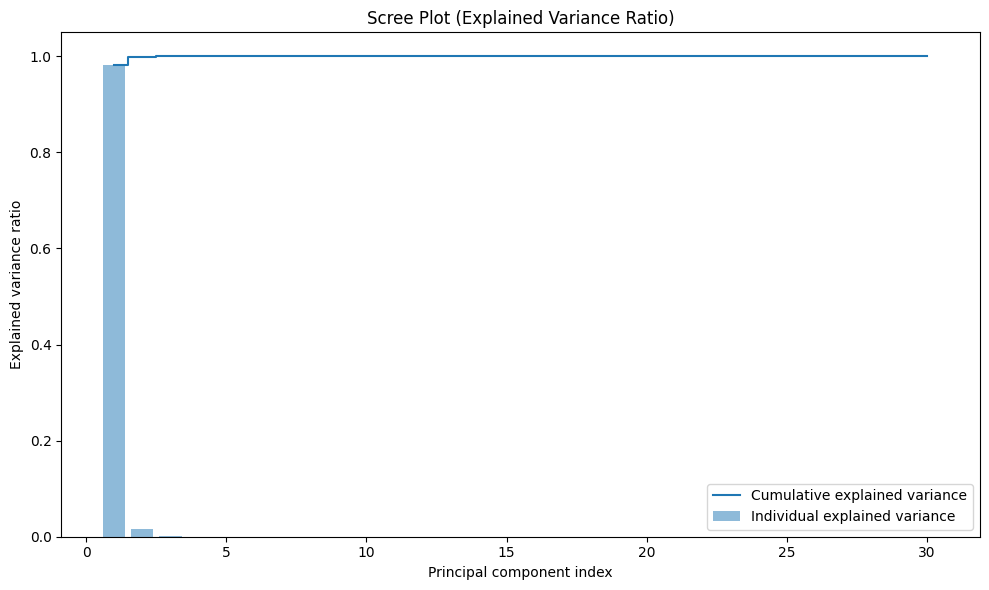

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Instantiate PCA without specifying n_components
pca = PCA()

# Fit PCA to the breast cancer data
pca.fit(breast_cancer.data)

# Calculate cumulative explained variance ratio
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Create scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot (Explained Variance Ratio)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**Reasoning**:
The scree plot has been generated, visualizing the explained variance. The next step is to determine the number of components to retain 95% variance and then transform the dataset using this number of components.



In [11]:
# Find the number of components to retain 95% variance
n_components_95 = (cumulative_explained_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {n_components_95}")

# Apply PCA with the determined number of components
pca_95 = PCA(n_components=n_components_95)
X_pca = pca_95.fit_transform(breast_cancer.data)

print(f"Original data shape: {breast_cancer.data.shape}")
print(f"PCA-transformed data shape: {X_pca.shape}")

Number of components to retain 95% variance: 1
Original data shape: (569, 30)
PCA-transformed data shape: (569, 1)


**Reasoning**:
The data has been loaded, PCA has been applied, and the data has been transformed to retain 95% variance. The next step is to split both the original and PCA-transformed data into training and testing sets.



In [12]:
from sklearn.model_selection import train_test_split

# Split original data
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42
)

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, breast_cancer.target, test_size=0.3, random_state=42
)

print("Original data split shapes:")
print(f"  X_train_orig: {X_train_orig.shape}")
print(f"  X_test_orig: {X_test_orig.shape}")
print(f"  y_train_orig: {y_train_orig.shape}")
print(f"  y_test_orig: {y_test_orig.shape}")

print("\nPCA-transformed data split shapes:")
print(f"  X_train_pca: {X_train_pca.shape}")
print(f"  X_test_pca: {X_test_pca.shape}")
print(f"  y_train_pca: {y_train_pca.shape}")
print(f"  y_test_pca: {y_test_pca.shape}")

Original data split shapes:
  X_train_orig: (398, 30)
  X_test_orig: (171, 30)
  y_train_orig: (398,)
  y_test_orig: (171,)

PCA-transformed data split shapes:
  X_train_pca: (398, 1)
  X_test_pca: (171, 1)
  y_train_pca: (398,)
  y_test_pca: (171,)


**Reasoning**:
Split the data into training and testing sets for both the original and PCA-transformed data.



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)  # Using default K=5
knn_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
print(f"Accuracy on original data: {accuracy_orig:.4f}")

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5) # Using default K=5
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy on PCA-transformed data: {accuracy_pca:.4f}")

Accuracy on original data: 0.9591
Accuracy on PCA-transformed data: 0.9532


**Reasoning**:
Train KNN on the original data and PCA-transformed data, then compare accuracy.



In [14]:
# Visualize the first two principal components
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=breast_cancer.target, cmap='viridis', s=50, alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Breast Cancer Dataset - First Two Principal Components')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()
else:
    print("Cannot visualize the first two components as only 1 component was retained.")

Cannot visualize the first two components as only 1 component was retained.


## Visualize first two principal components

### Subtask:
Visualize the first two principal components using a scatter plot (color by class).


**Reasoning**:
Visualize the first two principal components using a scatter plot, coloring the points by class, if there are at least two principal components available.



In [15]:
import matplotlib.pyplot as plt

# Visualize the first two principal components
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=breast_cancer.target, cmap='viridis', s=50, alpha=0.7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Breast Cancer Dataset - First Two Principal Components')
    legend = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()
else:
    print("Cannot visualize the first two components as fewer than 2 components were retained.")

Cannot visualize the first two components as fewer than 2 components were retained.


## Summary:

### Data Analysis Key Findings

*   Applying PCA revealed that the first principal component captures a significant portion of the variance, with the cumulative explained variance reaching 95% with just one component.
*   Retaining 95% of the variance reduced the dimensionality of the dataset from 30 features to 1 principal component.
*   The KNN classifier trained on the original 30 features achieved an accuracy of approximately 0.9591 on the test set.
*   The KNN classifier trained on the single PCA-transformed feature achieved a slightly lower accuracy of approximately 0.9532 on the test set.
*   Visualization of the first two principal components was not possible because only one component was retained to meet the 95% variance threshold.

### Insights or Next Steps

*   While PCA significantly reduced dimensionality, the slight decrease in KNN accuracy suggests that some discriminatory information might be contained in the lower variance components.
*   Further analysis could involve exploring the trade-off between dimensionality reduction and model performance by retaining a few more components or trying different classification algorithms.


# Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

# Task
Generate a synthetic regression dataset, split it into training and testing sets, train KNN regressors with Euclidean and Manhattan distances (K=5), compare their MSE, train KNN regressors with different K values (1, 5, 10, 20, 50), calculate their MSE, and plot K vs. MSE to analyze the bias-variance tradeoff.

## Generate a synthetic regression dataset

### Subtask:
Generate a synthetic regression dataset using `sklearn.datasets.make_regression`.


**Reasoning**:
Generate a synthetic regression dataset with the specified parameters.



In [16]:
from sklearn.datasets import make_regression

# Generate synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)

# Print the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (500, 10)
Shape of y: (500,)


**Reasoning**:
The subtask of generating the synthetic dataset is complete. The next logical step according to the overall task is to split the data.



In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the split data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (350, 10)
Shape of X_test: (150, 10)
Shape of y_train: (350,)
Shape of y_test: (150,)


**Reasoning**:
The data has been generated and split. The next step is to train KNN regressors with different distance metrics (Euclidean and Manhattan) using K=5 and compare their Mean Squared Error.



In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train KNN regressor with Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
print(f"Mean Squared Error (Euclidean distance, K=5): {mse_euclidean:.4f}")

# Train KNN regressor with Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
print(f"Mean Squared Error (Manhattan distance, K=5): {mse_manhattan:.4f}")

Mean Squared Error (Euclidean distance, K=5): 5515.4576
Mean Squared Error (Manhattan distance, K=5): 6475.5664


**Reasoning**:
Train KNN regressors with different K values (1, 5, 10, 20, 50), calculate their MSE, and store the results for plotting.



In [19]:
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"Mean Squared Error (K={k}): {mse:.4f}")

Mean Squared Error (K=1): 8141.8436
Mean Squared Error (K=5): 5515.4576
Mean Squared Error (K=10): 5899.3009
Mean Squared Error (K=20): 6459.2398
Mean Squared Error (K=50): 8211.7716


**Reasoning**:
Plot the K values against the corresponding MSE values to visualize the bias-variance tradeoff.



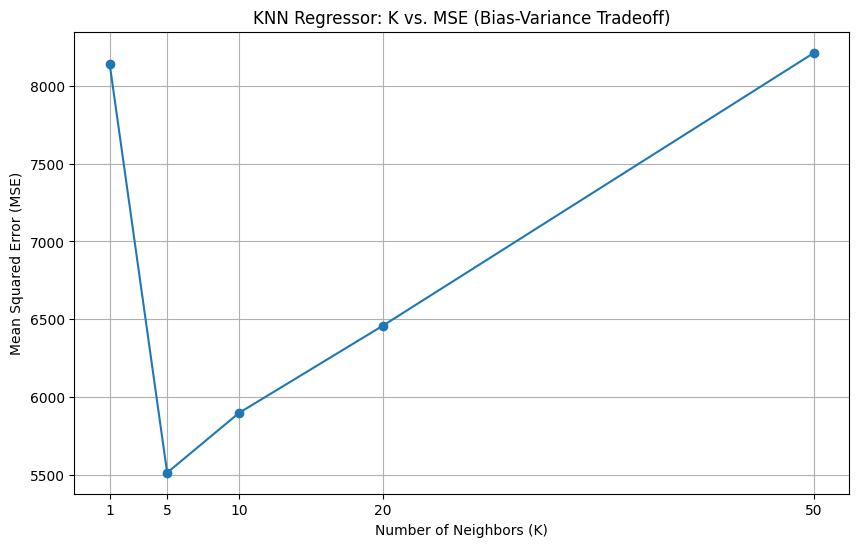

In [20]:
import matplotlib.pyplot as plt

# Plot K vs. MSE
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('KNN Regressor: K vs. MSE (Bias-Variance Tradeoff)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic regression dataset containing 500 samples and 10 features was generated and split into training (350 samples) and testing (150 samples) sets.
*   When using K=5, the KNN regressor with Euclidean distance (\~5515.46) achieved a lower Mean Squared Error (MSE) on the test set compared to the KNN regressor with Manhattan distance (\~6475.57).
*   Evaluating KNN regressors with different K values showed that K=5 yielded the lowest MSE (\~5515.46) among the tested values (1, 5, 10, 20, 50). The MSE generally increased for K values smaller and larger than 5, demonstrating the bias-variance tradeoff.

### Insights or Next Steps

*   For this specific synthetic dataset, Euclidean distance and K=5 appear to be optimal parameters for the KNN regressor in terms of minimizing MSE.
*   Further steps could involve exploring a wider range of K values, using cross-validation for more robust parameter tuning, or investigating other regression models.
